# BIOS512 Final Project
## Taylor Thames

In [1]:
# LOAD LIBRARIES
library('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [8]:
# READ IN CSV FILE
pride <- read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-06-11/pride_index.csv')

Rows: 238 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): campus_name, campus_location, community_type
dbl (2): rating, students

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [9]:
# PREVIEW THE DATA SET
head(pride)
glimpse(pride)

campus_name,campus_location,rating,students,community_type
<chr>,<chr>,<dbl>,<dbl>,<chr>
"University of Maryland, College Park","College Park, MD",5.0,37952,large urban city
University of Michigan-Dearborn,"Dearborn, MI",3.0,9000,medium city
SUNY Westchester Community College,"Valhalla, NY",4.0,13000,very small town
University at Buffalo,"Buffalo, NY",3.5,29850,medium city
Slippery Rock University,"Slippery Rock, PA",4.0,8500,rural community
Emory University,"Atlanta, GA",4.5,14769,large urban city


Rows: 238
Columns: 5
$ campus_name     <chr> "University of Maryland, College Park", "University of…
$ campus_location <chr> "College Park, MD", "Dearborn, MI", "Valhalla, NY", "B…
$ rating          <dbl> 5.0, 3.0, 4.0, 3.5, 4.0, 4.5, 5.0, 4.0, 4.5, 4.5, 4.5,…
$ students        <dbl> 37952, 9000, 13000, 29850, 8500, 14769, 19446, 1850, 3…
$ community_type  <chr> "large urban city", "medium city", "very small town", …


In [16]:
# SEPARATE CAMPUS_LOCATION INTO TWO VARIABLES
pride_n = pride |>
    separate(campus_location, into = c("city", "state"), sep = ",") 

head(pride_n)

Warning message:
“Expected 2 pieces. Additional pieces discarded in 2 rows [41, 117].”


campus_name,city,state,rating,students,community_type
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
"University of Maryland, College Park",College Park,MD,5.0,37952,large urban city
University of Michigan-Dearborn,Dearborn,MI,3.0,9000,medium city
SUNY Westchester Community College,Valhalla,NY,4.0,13000,very small town
University at Buffalo,Buffalo,NY,3.5,29850,medium city
Slippery Rock University,Slippery Rock,PA,4.0,8500,rural community
Emory University,Atlanta,GA,4.5,14769,large urban city


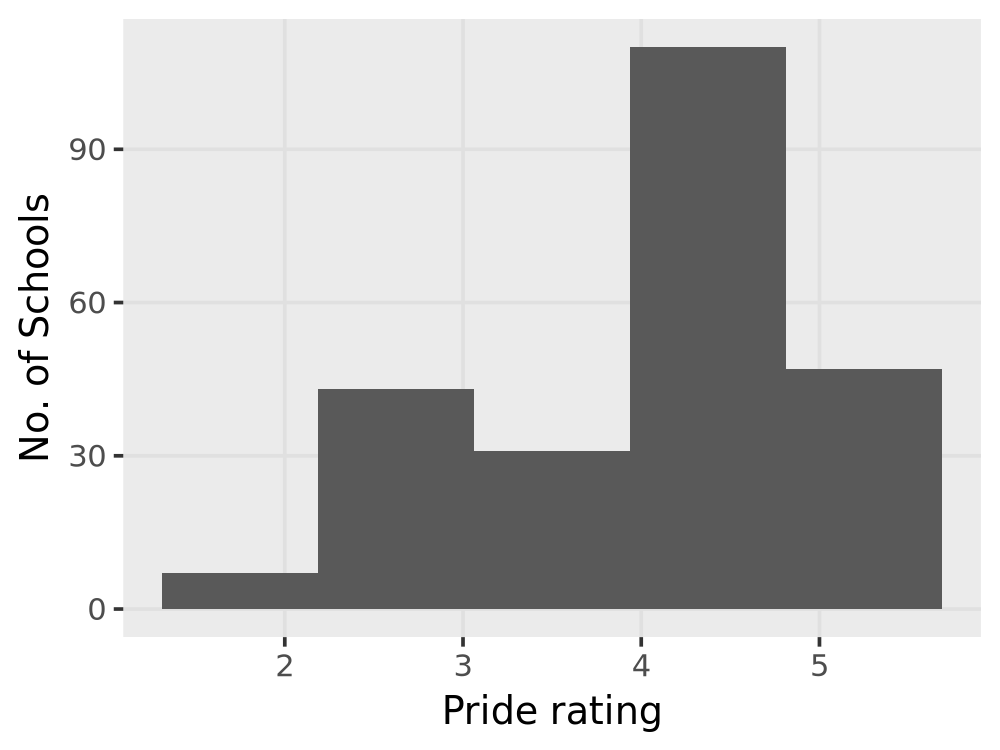

In [53]:
# CREATE A HISTOGRAM TO DETERMINE THE COUNT OF SCHOOLS IN EACH RATING (1-2, 2-3, 3-4, 4-5)
pride_n |>
    ggplot(aes(x = rating)) +
    geom_histogram(bins = 5) +
    labs(x = 'Pride rating',
         y = 'No. of Schools') +
    theme(panel.spacing = unit(0.5, "cm"),
          panel.grid.major = element_line(color = '#e0e0e0'),
          panel.grid.minor = element_blank())

This plot is a basic histogram with bins representing the average pride rating of each university in the dataset. Fewer than 10 schools have a pride rating below 2, while most schools have a pride rating equal to or above 4. The distribution of the histogram is left skewed, which aligns with the fact that most universities foster an environment of school pride. 

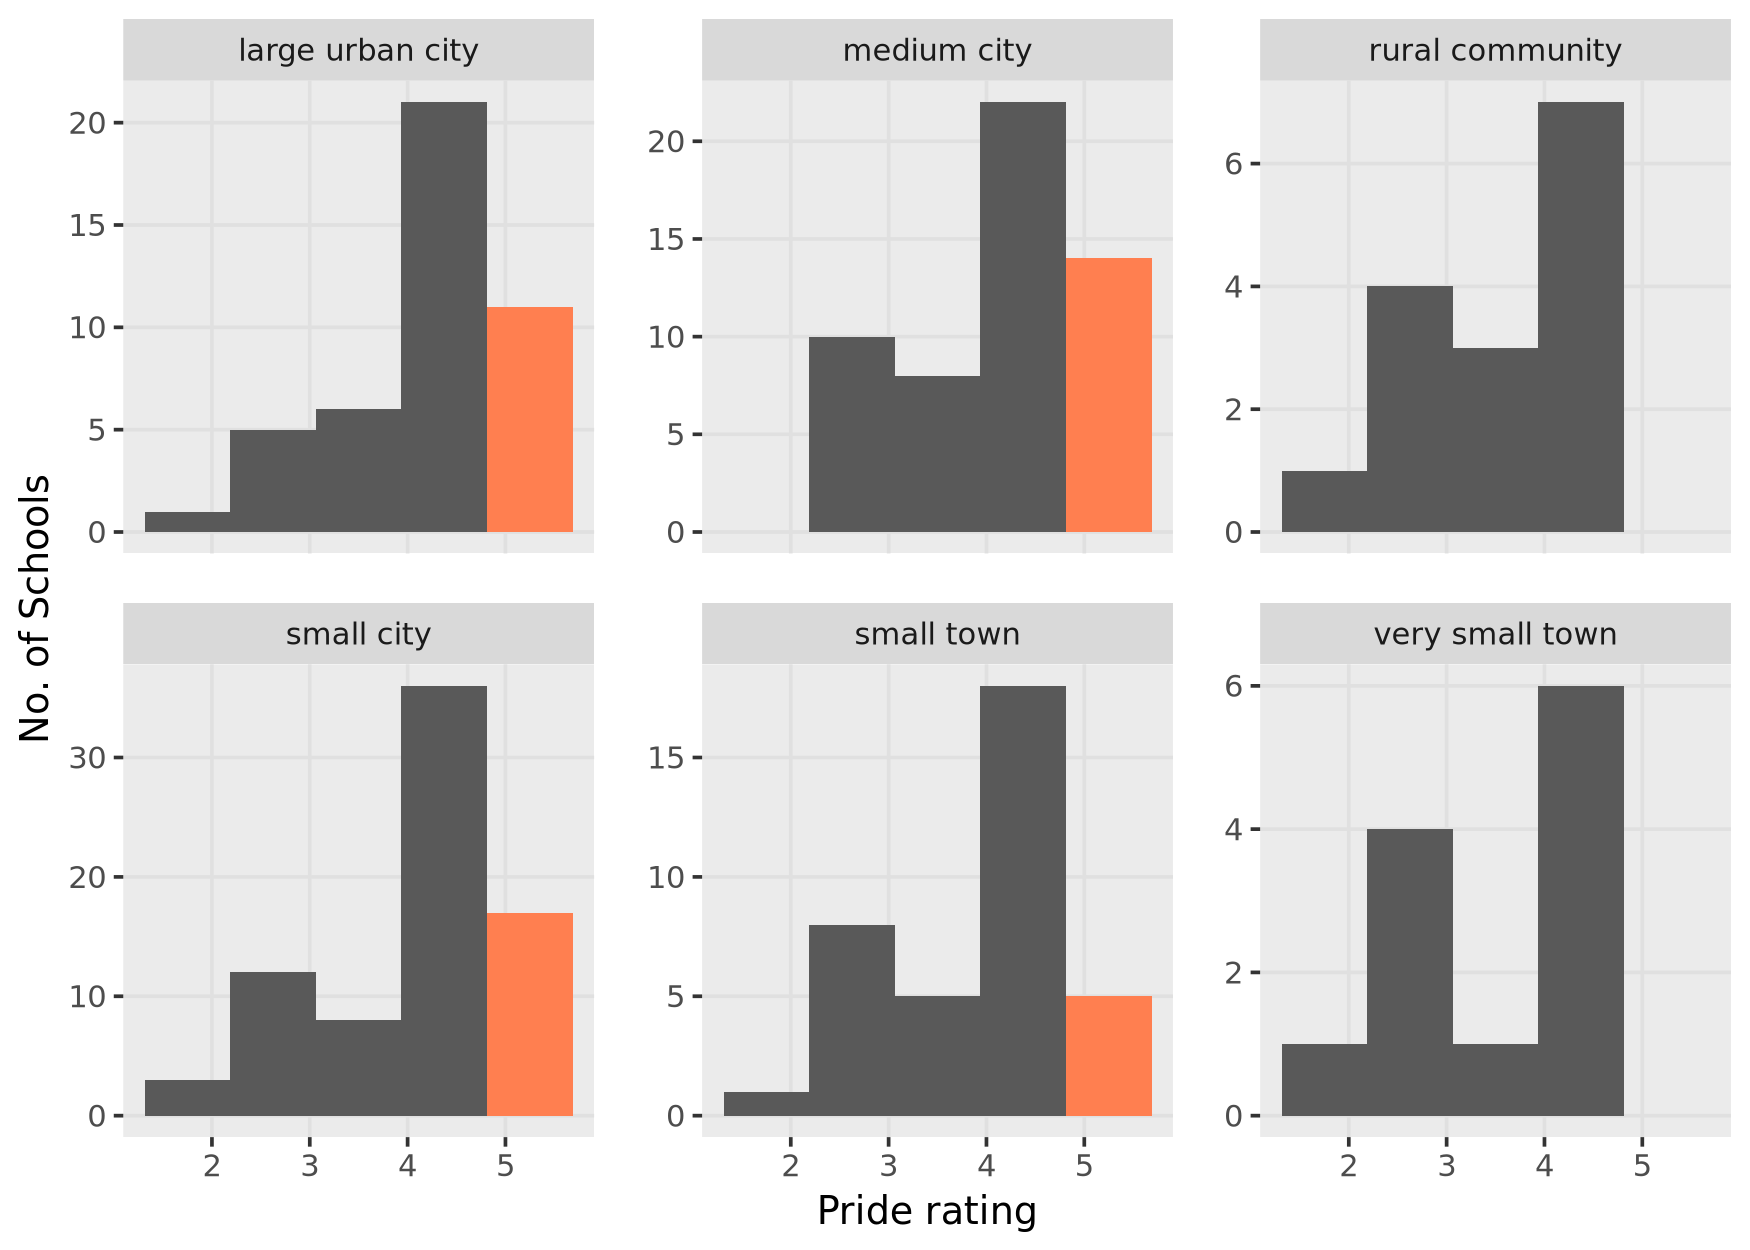

In [65]:
options(repr.plot.height = 5, repr.plot.width = 7)

# CREATE A SERIES OF HISTOGRAMS SHOWING THE PRIDE RATINGS BY COMMUNITY TYPES
pride_n |>
    mutate(community_type = fct_reorder(community_type, students, sum) |> fct_rev()) |>
    ggplot(aes(x = rating)) +
    geom_histogram(bins = 5) +
    labs(x = 'Pride rating',
         y = 'No. of Schools') +
    theme(panel.spacing = unit(0.5, "cm"),
          panel.grid.major = element_line(color = '#e0e0e0'),
          panel.grid.minor = element_blank()) +
    facet_wrap(~community_type, scales = 'free_y') +
    geom_histogram(fill = 'coral', bins = 5, data = pride_n |> filter(rating == 5))

In order to further explore the distribution of school pride ratings, I decided to stratify the previous histogram by the type of community that each school resides in. First, it is obvious given the differences in the y-axis that communities that fall into "small town" or smaller have fewer universities. Second, the orange bars highlight the schools with a pride rating of 5. None of the schools in very small towns or rural communities report a pride rating of 5. While this data visualization gives us additional information about school pride across community types, I would improve it by showing proportions reported across the community types to normalize for the differences in the total number of schools in each community type.

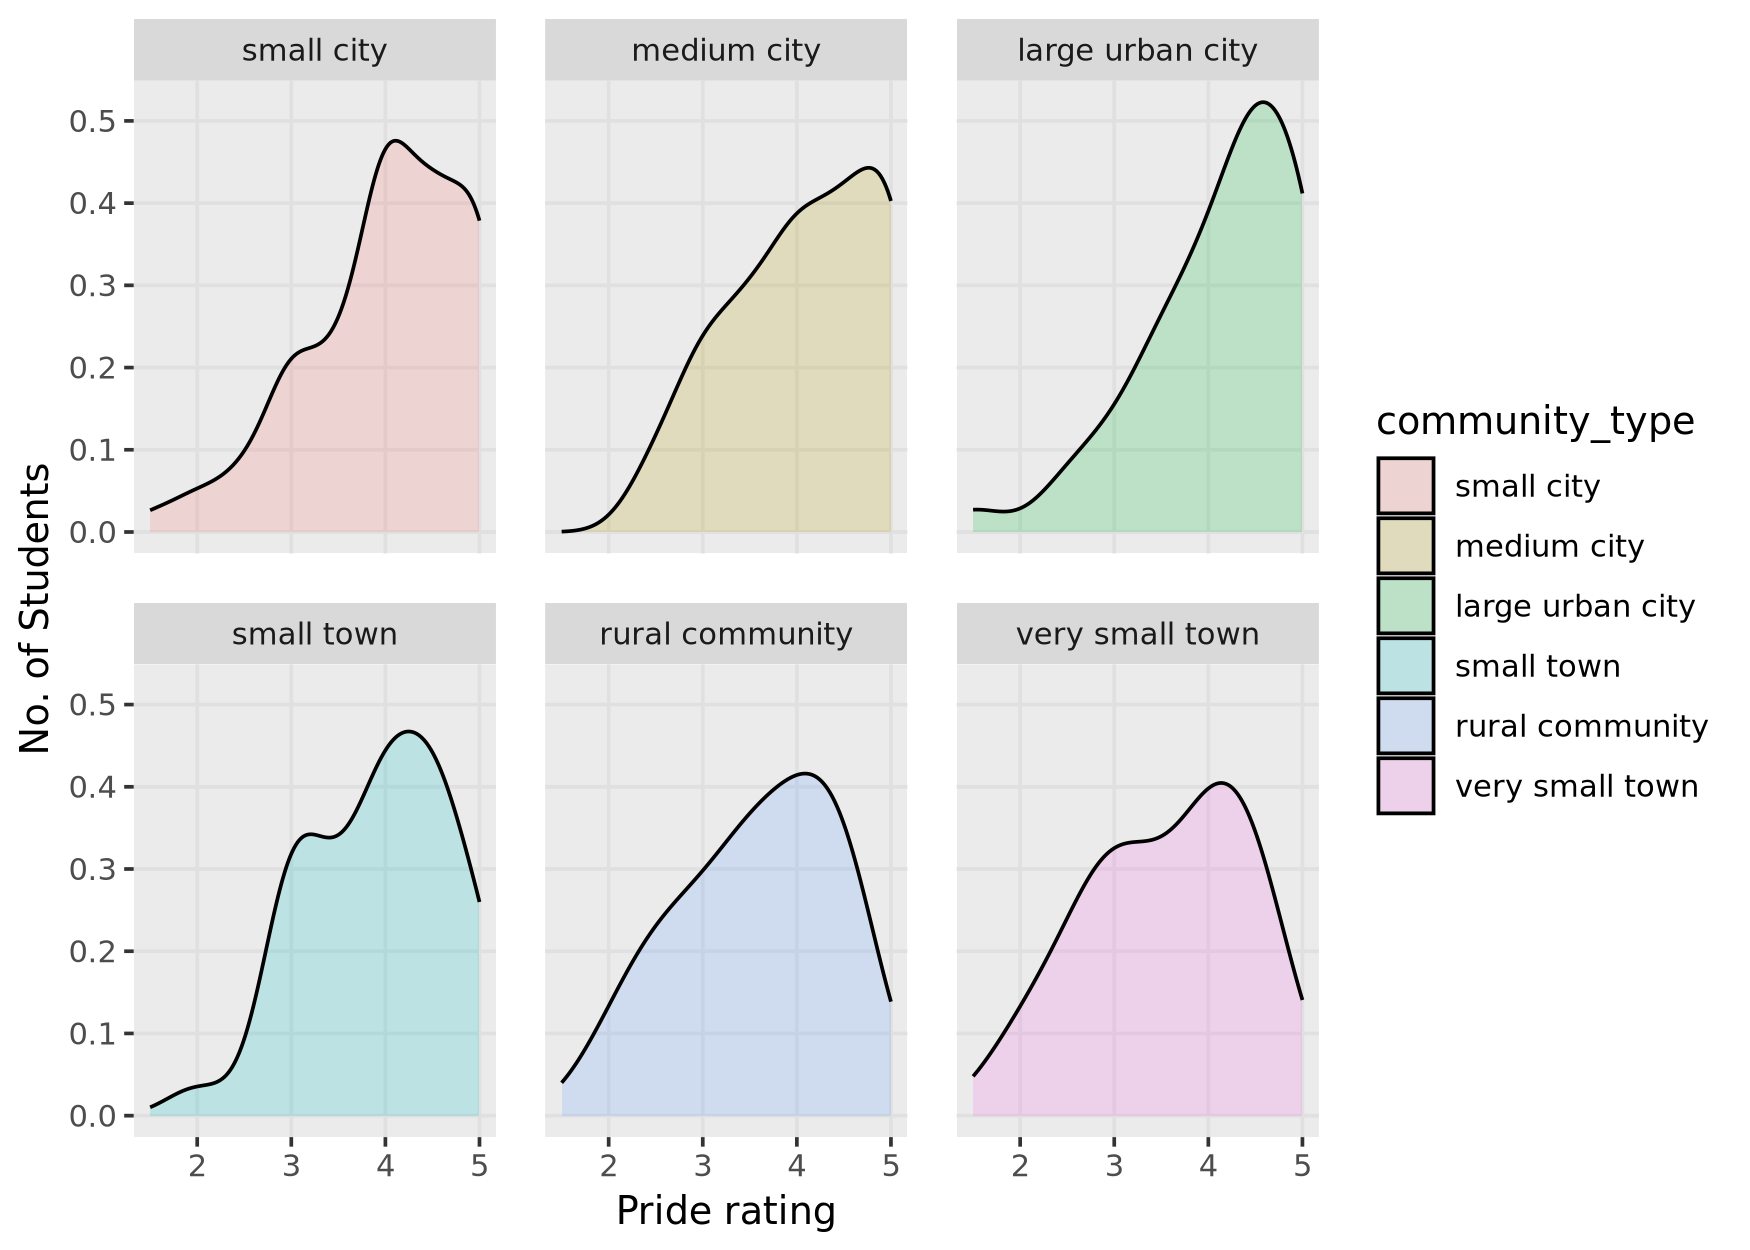

In [76]:
options(repr.plot.height = 5, repr.plot.width = 7)

# CREATE A SERIES OF DENSITY PLOTS SHOWING THE PRIDE RATINGS BY COMMUNITY TYPES
pride_n |>
    mutate(community_type = fct_reorder(community_type, students, sum) |> fct_rev()) |>
    ggplot(aes(x = rating, fill = community_type)) +
    geom_density(alpha = 0.2) +  # geom_smooth(method = "lm", se = FALSE, color = "blue") +
    labs(x = 'Pride rating',
         y = 'No. of Students') +
    theme(panel.spacing = unit(0.5, "cm"),
          panel.grid.major = element_line(color = '#e0e0e0'),
          panel.grid.minor = element_blank()) +
    facet_wrap(~community_type)

I decided to re-create the above histograms in the form of a density plot to achieve normalization for the total number of schools within each community type. From the density plots, we can more clearly see the very small towns and rural communities have a slightly smaller proportion of schools with pride ratings of 4 to 5. However, the distribution of the proportion of schools in each rating is relatively similar across all community types.

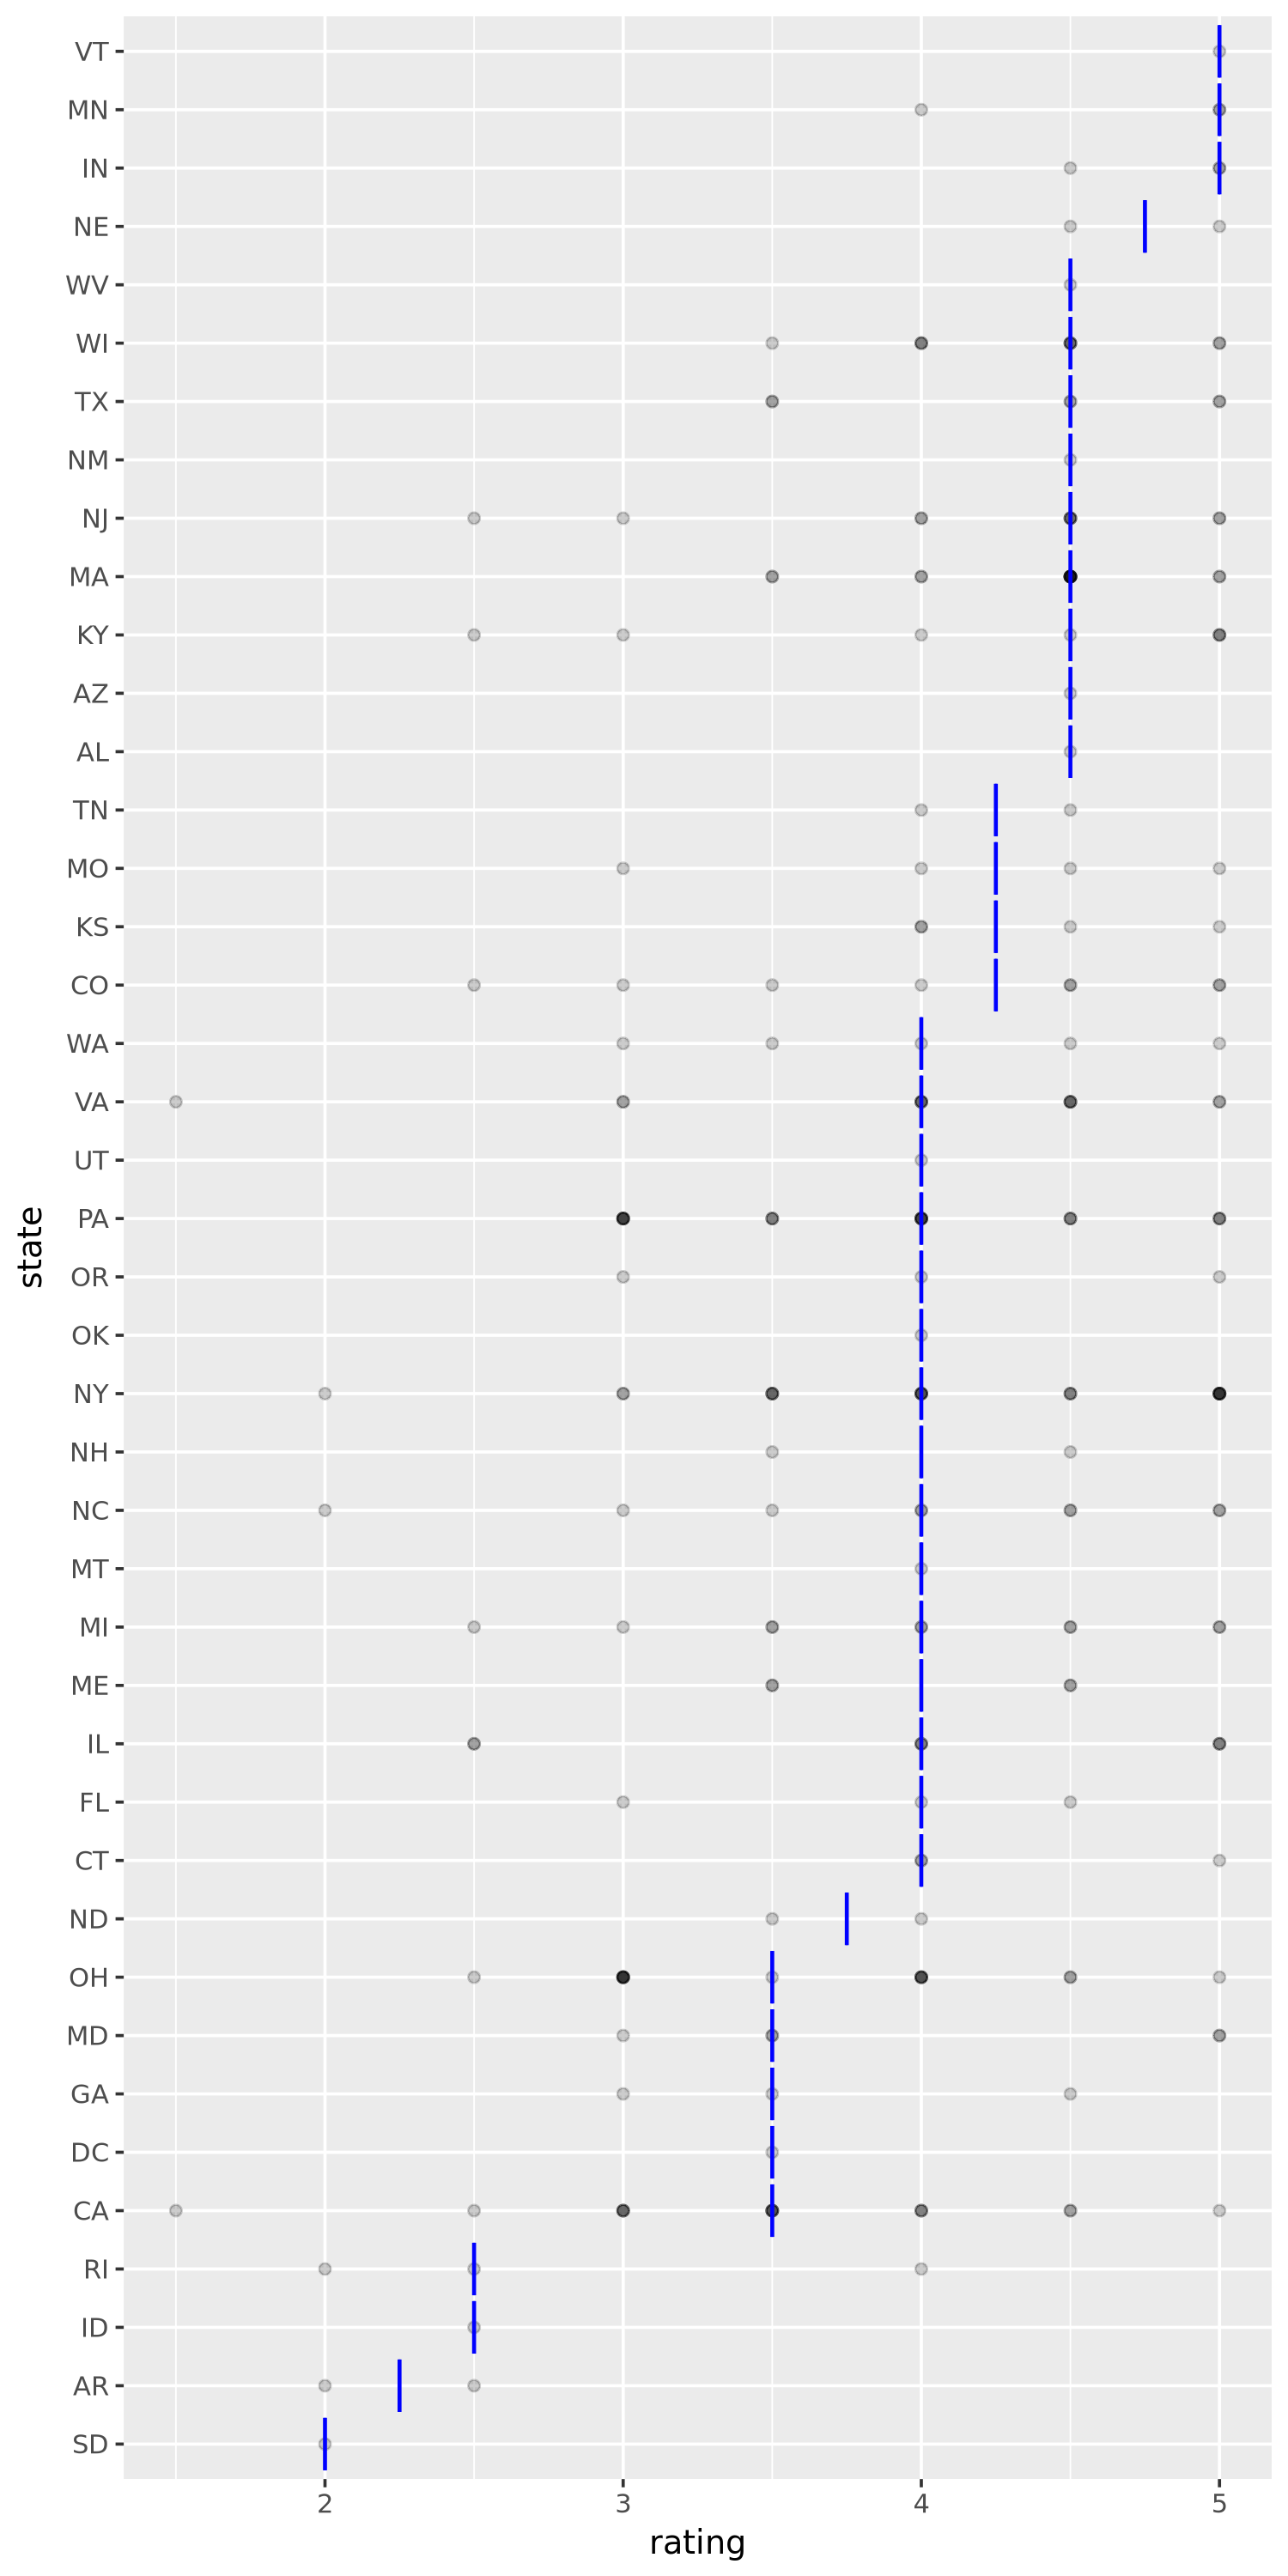

In [22]:
options(repr.plot.height = 12, repr.plot.width = 6)

# MAKE A CHART OF THE RATING BY STATE
pride_n |>
    mutate(state = fct_reorder(state, rating, median)) |>
    group_by(state) |>
    ggplot(aes(x = rating, y = state)) + 
        geom_point(position = position_jitter(height = 0, width = 0), alpha = 0.2) +
        geom_crossbar(color = 'blue', linewidth=0.25,
                      data = pride_n |> group_by(state) |> summarize(rating = median(rating)), 
                      mapping = aes(xmin = rating, xmax = rating))

This chart shows all of the reported universities and their respective pride rating in each state. The crossbars represent the median pride rating for all universities within a state. The state with the lowest median university pride rating is South Dakota, followed by Arkansas and Idaho. The states with the highest median university pride rating include Vermont, Minnesota, and Indiana. A large number of states had a median pride rating between 3.5 and 4.5.

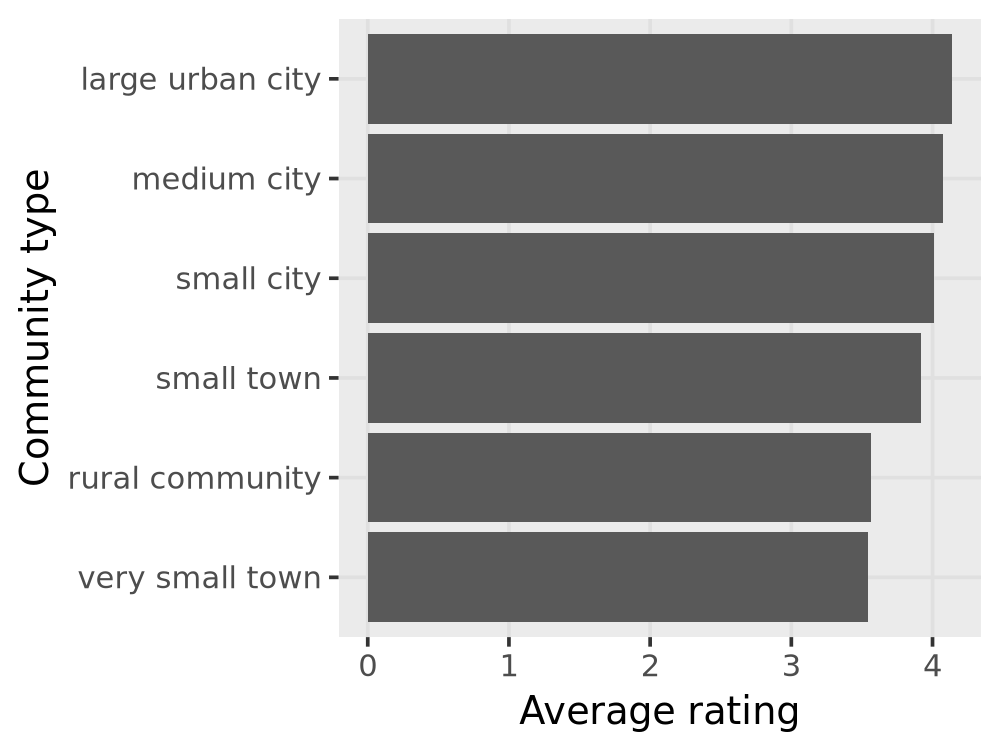

In [77]:
options(repr.plot.height = 3, repr.plot.width = 4)

# EXTRA CHART OF THE AVERAGE RATING BY COMMUNITY TYPE
pride_avg = pride |>
    group_by(community_type) |>
    summarize(average = mean(rating)) |>
    arrange(desc(average))

pride_avg |>
    mutate(community_type = fct_reorder(community_type, average, mean)) |>
    ggplot(aes(x = average, y = community_type)) + geom_col() +
    labs(x = 'Average rating',
         y = 'Community type') +
    theme(panel.spacing = unit(0.5, "cm"),
          panel.grid.major = element_line(color = '#e0e0e0'),
          panel.grid.minor = element_blank())